In [1]:
#Import all needed modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random as rand
from IPython.display import display, clear_output
from matplotlib import cm
import time

In [2]:
#ALL above is just making a usable dataset
#From Data
transmission_by_county = {'Clinton' : 0.221122, 'Eaton' : 0.272616, 'Ingham' : 0.248289, 'NA' : 0.30}
vax_rate_by_county = [0.6208/(3*365),0.5854/(3*365),0.5871/(3*365)]
#Average
vax_rate = sum(vax_rate_by_county)/3
#3 Types of vaccines
vaccine_effect_rate = [0.85,0.9,0.95]

Landscape = np.genfromtxt('EnvironmentMap_Lansing.csv', delimiter=',')

In [12]:
#Create person class
class Person:
    def __init__(self, x, y, infected=False, county = None, vaccinated = False):
        self.infected = infected
        self.vaccinated = vaccinated
        self.vaccine_eff = 0
        self.x = x
        self.y=y
        self.county = county
        self.antibodies = 0
        self.set_antibodies(county,transmission_by_county)
        self.home_x = x
        self.home_y = y
        #Set values from parameters and base values

    def move(self, movement_options,grid):
        x_change = rand.choice(movement_options)
        y_change = rand.choice(movement_options)
        new_x = max(0, min(self.x + x_change, grid_size[0] - 1))
        new_y = max(0, min(self.y + y_change, grid_size[1] - 1))
        
        if grid[new_x, new_y] == 0:
            if rand.random() < 0.1:
                self.x = new_x
                self.y = new_y
        else:
                self.x = new_x
                self.y = new_y
        # Adjusts the probability of moving towards areas with buildings and roads
    def home(self):
        self.x=self.home_x
        self.y=self.home_y
        #Sends person back to original x and y coords
    
    def jump(self,grid):
        new_x = rand.randint(1,grid_size[0]-1)
        new_y = rand.randint(1,grid_size[1]-1)
        if grid[new_x,new_y]==0:
            pass
        else:
            self.x= new_x
            self.y= new_y
        #Chance to send person to random populated area
    
    def transmit(self, people):
        if self.infected:
            for person in people:
                if not person.infected and person.x == self.x and person.y == self.y:
                    if rand.random() < virus.inf_rate*(1-self.antibodies)*(1-self.vaccine_eff):
                        person.infected = True
        #Chance to transmit virus if 2 people occupy the same square
    def die(self, person_list):
        if self.infected:
            if rand.random() < virus.mort_rate*(1-(self.vaccine_eff-0)):
                person_list.remove(self)
        #Chance to die and get removes from simulation

    def set_antibodies(self, county, transmission_by_county):
        self.antibodies = transmission_by_county.get(county)
        return 
        #sets the antibody values
    def get_vaxxed(self):
        if not self.vaccinated: 
            if rand.random() < vax_rate:
                self.vaccinated = True
                self.vaccine_eff = vaccine_effect_rate[rand.choice([0,1,2])]
        #Vaccinated person    
    def draw(self):
        color = 'b'
        if (self.infected == True):
            color = 'g'
        plt.scatter(float(self.y),float(self.x), color=color, s = 3)
            
        #Draws person on animation
            


In [4]:
grid_size=(75,100) #Tracks the size of environment

In [5]:
#Create Virus class
class Virus:
    def __init__(self, infection_rate, mortality_rate):
        self.inf_rate = infection_rate
        self.mort_rate = mortality_rate
        #Sets infection and mortality rate
    def mutate(self):
        if rand.random() < 0.05:
            self.inf_rate = self.inf_rate + 0.004
            self.mort_rate = self.mort_rate + .00001
        #Allows for changes to infection and mortality

Initial Virus infection and mortality rate: 0.2 0.0006


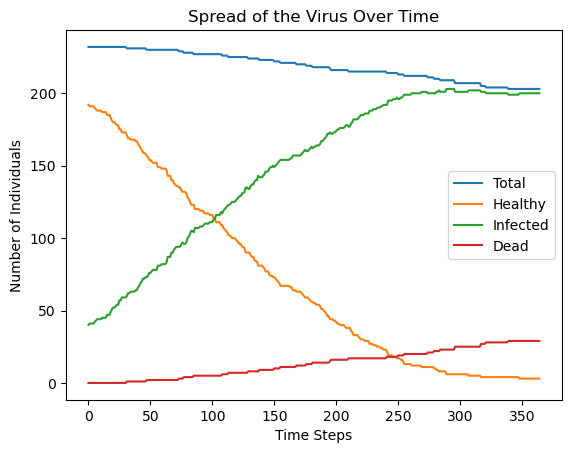

Final Virus infection and mortality rate: 0.26400000000000007 0.0007600000000000004


In [22]:
#Initialize Objects
#Test Run 1
inf_rate = 0.2
death_rate = 0.0006
people = []

#Initalize people
for j in range(len(Landscape[0,:])):
    for i in range(len(Landscape[:,0])):
        if Landscape[i,j] == 0:
            if rand.random() < 0.02:
                people.append(Person(x=i,y=j,infected=rand.random() < inf_rate))
                
        if Landscape[i,j] == 1:
            if rand.random() < 0.08:
                people.append(Person(x=i,y=j,infected=rand.random() < inf_rate))
                        
num_people = len(people)                        

virus = Virus(inf_rate, death_rate)
#Initialize virus

print('Initial Virus infection and mortality rate:',virus.inf_rate,virus.mort_rate)
num_steps = 365
infected_counts = []
dead_counts = []
healthy_counts = []
total_counts = []
# Simulation loop
for person in people:
    if person.y > 50:
        person.county = 'Clinton'
        
    elif person.x < 50:
        person.county = 'Eaton'
            
    else:
        person.county = 'Ingham' 
        
    person.set_antibodies(person.county,transmission_by_county)
        
for step in range(num_steps):
    # Move people
    for person in people:
        value = rand.random()
        if value<=.5:
            person.jump(Landscape)
        elif value<=.1:
            person.home()
        else:
            person.move([-5,0,5],Landscape)

    # Transmit the virus
    for person in people:
        person.transmit(people)
        person.die(people)
        person.get_vaxxed()
        
    virus.mutate()
            

    # Track the number of infected individuals
    total_count = len(people)
    dead_count = num_people - len(people)
    infected_count = sum(1 for person in people if person.infected)
    healthy_count = num_people - dead_count - infected_count
    total_counts.append(total_count)
    infected_counts.append(infected_count)
    dead_counts.append(dead_count)
    healthy_counts.append(healthy_count)

plt.plot(range(num_steps), total_counts, label = 'Total')
plt.plot(range(num_steps), healthy_counts, label = 'Healthy')
plt.plot(range(num_steps), infected_counts, label = 'Infected')
plt.plot(range(num_steps), dead_counts, label = 'Dead')
plt.xlabel('Time Steps')
plt.ylabel('Number of Individuals')
plt.title('Spread of the Virus Over Time')
plt.legend(loc = 'center right')
plt.show()
print('Final Virus infection and mortality rate:',virus.inf_rate,virus.mort_rate)
#End of Test run 1

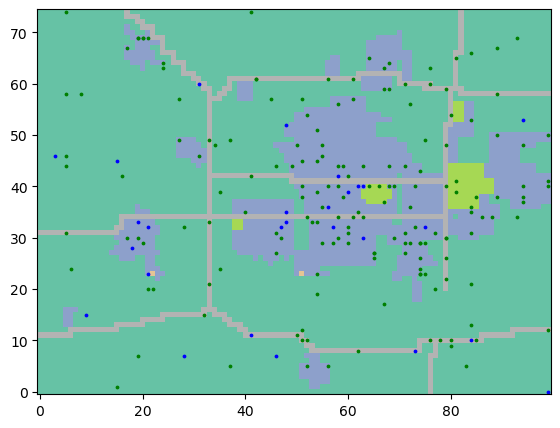

Total people: 200
Infected people: 173
Healthy people: 27
Dead people: 19
Runtime 276.19106674194336
Frametime 2.3577768802642822


<Figure size 1000x500 with 0 Axes>

In [23]:
#On some animation shit
#test run 2 (has animation)
inf_rate = 0.6
death_rate = 0.001
people = []
#Initalize people
for j in range(len(Landscape[0,:])):
    for i in range(len(Landscape[:,0])):
        if Landscape[i,j] == 0:
            if rand.random() < 0.02:
                people.append(Person(x=i,y=j,infected=rand.random() < inf_rate))
                
        if Landscape[i,j] == 1:
            if rand.random() < 0.08:
                people.append(Person(x=i,y=j,infected=rand.random() < inf_rate))

#Track totals
num_people = len(people)                        
virus = Virus(inf_rate, death_rate)
num_steps = 100
infected_counts = []
dead_counts = []
healthy_counts = []
total_counts = []


# Simulation loop
for person in people:
    if person.y > 50:
        person.county = 'Clinton'
        
    elif person.x < 50:
        person.county = 'Eaton'
            
    else:
        person.county = 'Ingham' 
        
    person.set_antibodies(person.county,transmission_by_county)


fig, ax = plt.subplots(figsize=(10, 5))

#Identify county and set person values based on county values
for person in people:
    if person.y > 50:
        person.county = 'Clinton'
        
    elif person.x < 50:
        person.county = 'Eaton'
            
    else:
        person.county = 'Ingham' 
        
    person.set_antibodies(person.county,transmission_by_county)
P_landscape= Landscape.astype(float)    
start = time.time()
for step in range(num_steps):
    fstart = time.time()
    # Move people
    for person in people:
        person.move([-5,0,5],Landscape)

    # Transmit the virus
    for person in people:
        person.transmit(people)
        person.die(people)
        person.get_vaxxed()
    virus.mutate()
            

    # Track the number of infected individuals
    total_count = len(people)
    dead_count = num_people - len(people)
    infected_count = sum(1 for person in people if person.infected)
    healthy_count = num_people - dead_count - infected_count
    total_counts.append(total_count)
    infected_counts.append(infected_count)
    dead_counts.append(dead_count)
    healthy_counts.append(healthy_count)
    test1 = plt.imshow(P_landscape, origin='lower', aspect='equal', cmap="Set2")

    for a in range(len(people)):
        people[a].draw()        
    # Animaiton part (dosn't change)
    clear_output(wait=True)  # Clear output for dynamic display
    display(fig)  # Reset display
    fig.clear()  # Prevent overlapping and layered plots

    time.sleep(0.0001)  # Sleep for a fraction of a second to allow animation to catch up
    print('Total people:',total_count)
    print('Infected people:',infected_count)
    print('Healthy people:',healthy_count)
    print('Dead people:',dead_count)
    end = time.time()
    print("Runtime",end - start)
    print("Frametime",end - fstart)